# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 4. Доверительные интервалы
### Дедлайн --- 29 ноября 9:00

Мы предлагаем выполнять задания прямо в этом ноутбуке. **Пожалуйста, не стирайте условия задач и не переименовывайте ноутбук!**

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 10 баллов**.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
%config InlineBackend.figure_format="retina"  # only for retina display

from tqdm.notebook import tqdm
from typing import Callable, Tuple

sns.set(font_scale=1.4, style='whitegrid', palette='Set2')
np.random.seed(42)

In [ ]:
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

## Задача 1

Сгенерируйте выборку $X_1, ...,X_{100}$ из распределения $P_\theta$.

Для уровня доверия $\alpha = 0.95$ для всех $n \leq 100$
изобразите на графиках в координатах $(n, \theta)$
* Доверительный интервал оценки $\widehat{\theta}$
* График оценки $\widehat{\theta}$
* Точки выборки

Для отрисовки доверительного интервала используйте `plt.fill_between`. Не забывайте про параметр `alpha`.

Для того, чтобы избежать дублирования кода, рекомендуем написать функцию `draw_confidence_interval`, изображающую на графике все необходимое.

In [ ]:
from collections import namedtuple

In [ ]:
Estimator = Callable[[np.array], np.float]
ConfidenceInterval = namedtuple('ConfidenceInterval', ['lower', 'upper'])

In [ ]:
def apply_func_on_prefixes(sample: np.array, func: Estimator, except_n: int= -1) -> np.array:
  result = np.zeros_like(sample)
  for i in range(len(sample)):
    result[i] = func(sample[:i + 1]) if i + 1 != except_n else 0
  return result

def draw_confidence_interval(sample: np.array, estimator: Estimator, ci: ConfidenceInterval,
                             title: str, label: str, y_lims: Tuple[float, float] = None):
  fig, axis = plt.subplots(figsize=(18,8))
  plt.title(f'Confidence interval for {title}', fontsize=20)
  grid = np.arange(len(sample)) + 1

  estimation_values = apply_func_on_prefixes(sample, estimator)
  lower_ci_values = apply_func_on_prefixes(sample, ci.lower)
  upper_ci_values = apply_func_on_prefixes(sample, ci.upper)

  axis.plot(grid, estimation_values, label=f'{label}', 
            color=sns.color_palette("Set2")[0])
  axis.scatter(grid, sample, color=sns.color_palette("Set2")[2],
               label='Sample values')
  
  plt.fill_between(x=grid, y1=lower_ci_values, y2=upper_ci_values, 
                   alpha=0.3, label='Confidence interval')


  axis.set_xlabel('Sample size', fontsize=16)
  axis.set_ylabel(r'Value of $\theta$', fontsize=16)
  if y_lims is not None:
    axis.set_ylim(y_lims[0], y_lims[1])
  plt.legend()
  plt.show()

Выполните задание для следующих $P_\theta$ и $\widehat{\theta}$ (формулы доверительных итервалов были получены на семинарах):

### 1. Равномерное распределение, $\theta = 10$, оценка $\widehat{\theta} = X_{(n)}$

In [ ]:
THETA = 10
LAMBDA = 3
N = 100
ALPHA = 0.95
LOWER_NORM_QTL = sps.norm().ppf((1 - ALPHA) / 2)
UPPER_NORM_QTL = sps.norm().ppf((1 + ALPHA) / 2)

Пусть $X_1, X_2, \dots, X_n$ выборка из равномерного распределения $U(0, \theta)$. Тогда доверительный интервал уровня доверия $\alpha$ для параметра $\theta$ используя оценку  $\widehat{\theta} = X_{(n)}$  имеет вид:
$$
(T_1 = X_{(n)}; T_2 = \frac{X_{(n)}}{\sqrt[n]{1-\alpha}})
$$   

In [ ]:
sample = sps.uniform(loc=0, scale=THETA).rvs(size=N)

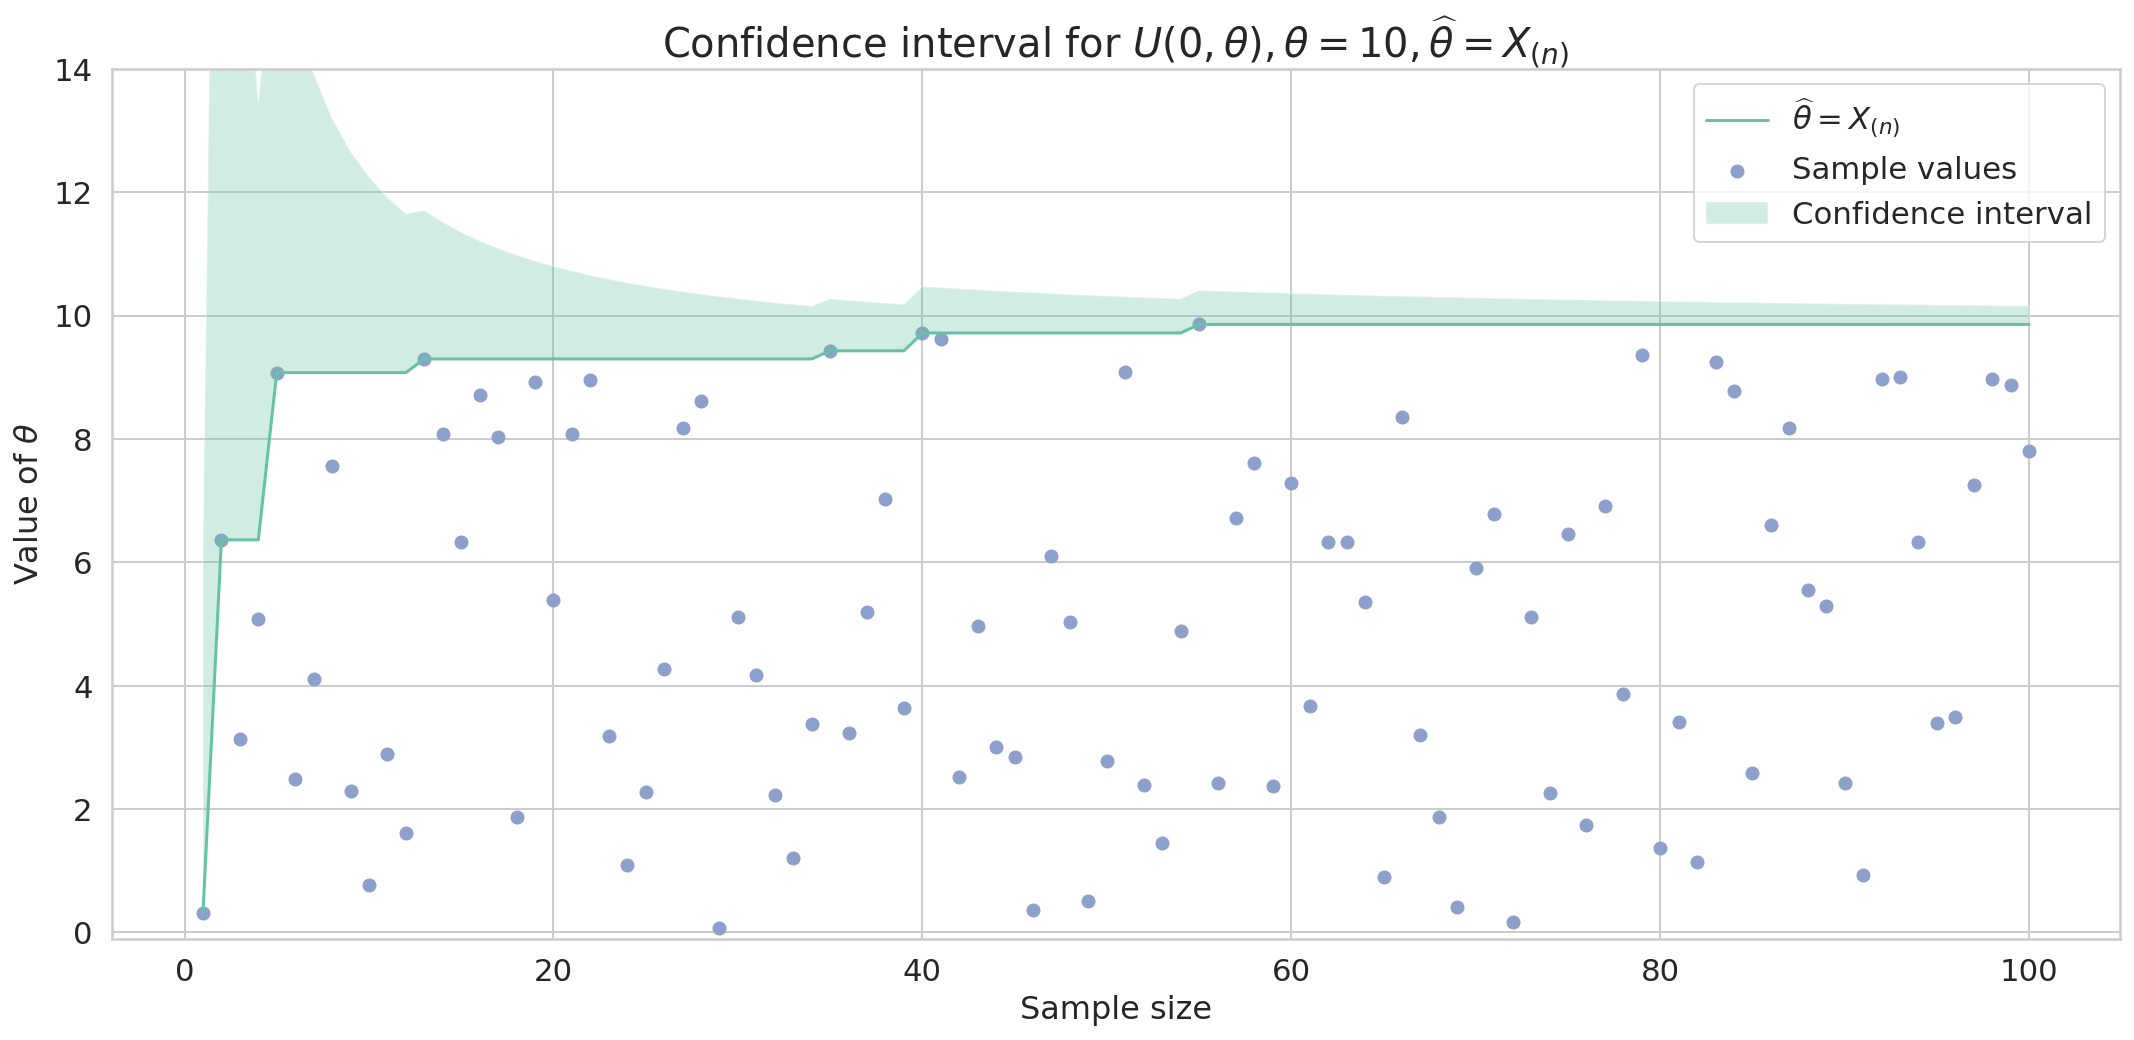

In [ ]:
draw_confidence_interval(
    sample,
    lambda sample: sample.max(),
    ConfidenceInterval(
        lambda sample: sample.max(), 
        lambda sample: sample.max() / np.power(1 - ALPHA, 1 / len(sample))
    ),
    title=r'$U(0, \theta), \theta = 10, \widehat{\theta} = X_{(n)}$',
    label=r'$\widehat{\theta} = X_{(n)}$',
    y_lims=(-0.1, 14),
)

### 2. Распределение Коши, $\theta = 10$, оценка — медиана

Пусть $X_1, X_2, \dots, X_n$ выборка из распределения Коши $Cauchy(\theta, 1)$. Тогда доверительный интервал уровня доверия $\alpha$ для параметра $\theta$ используя оценку $\widehat{\theta} = \mu$ имеет вид:
$$
(T_1 = \mu - \frac{\pi}{2\sqrt{n}} u_{\frac{1+\alpha}{2}}; T_2 = \mu - \frac{\pi}{2\sqrt{n}} u_{\frac{1-\alpha}{2}})
$$   
где $u_{\omega} - \omega$ квантиль нормального распределения $\mathcal{N}(0, 1)$.

In [ ]:
sample = sps.cauchy(loc=THETA, scale=1).rvs(size=N)

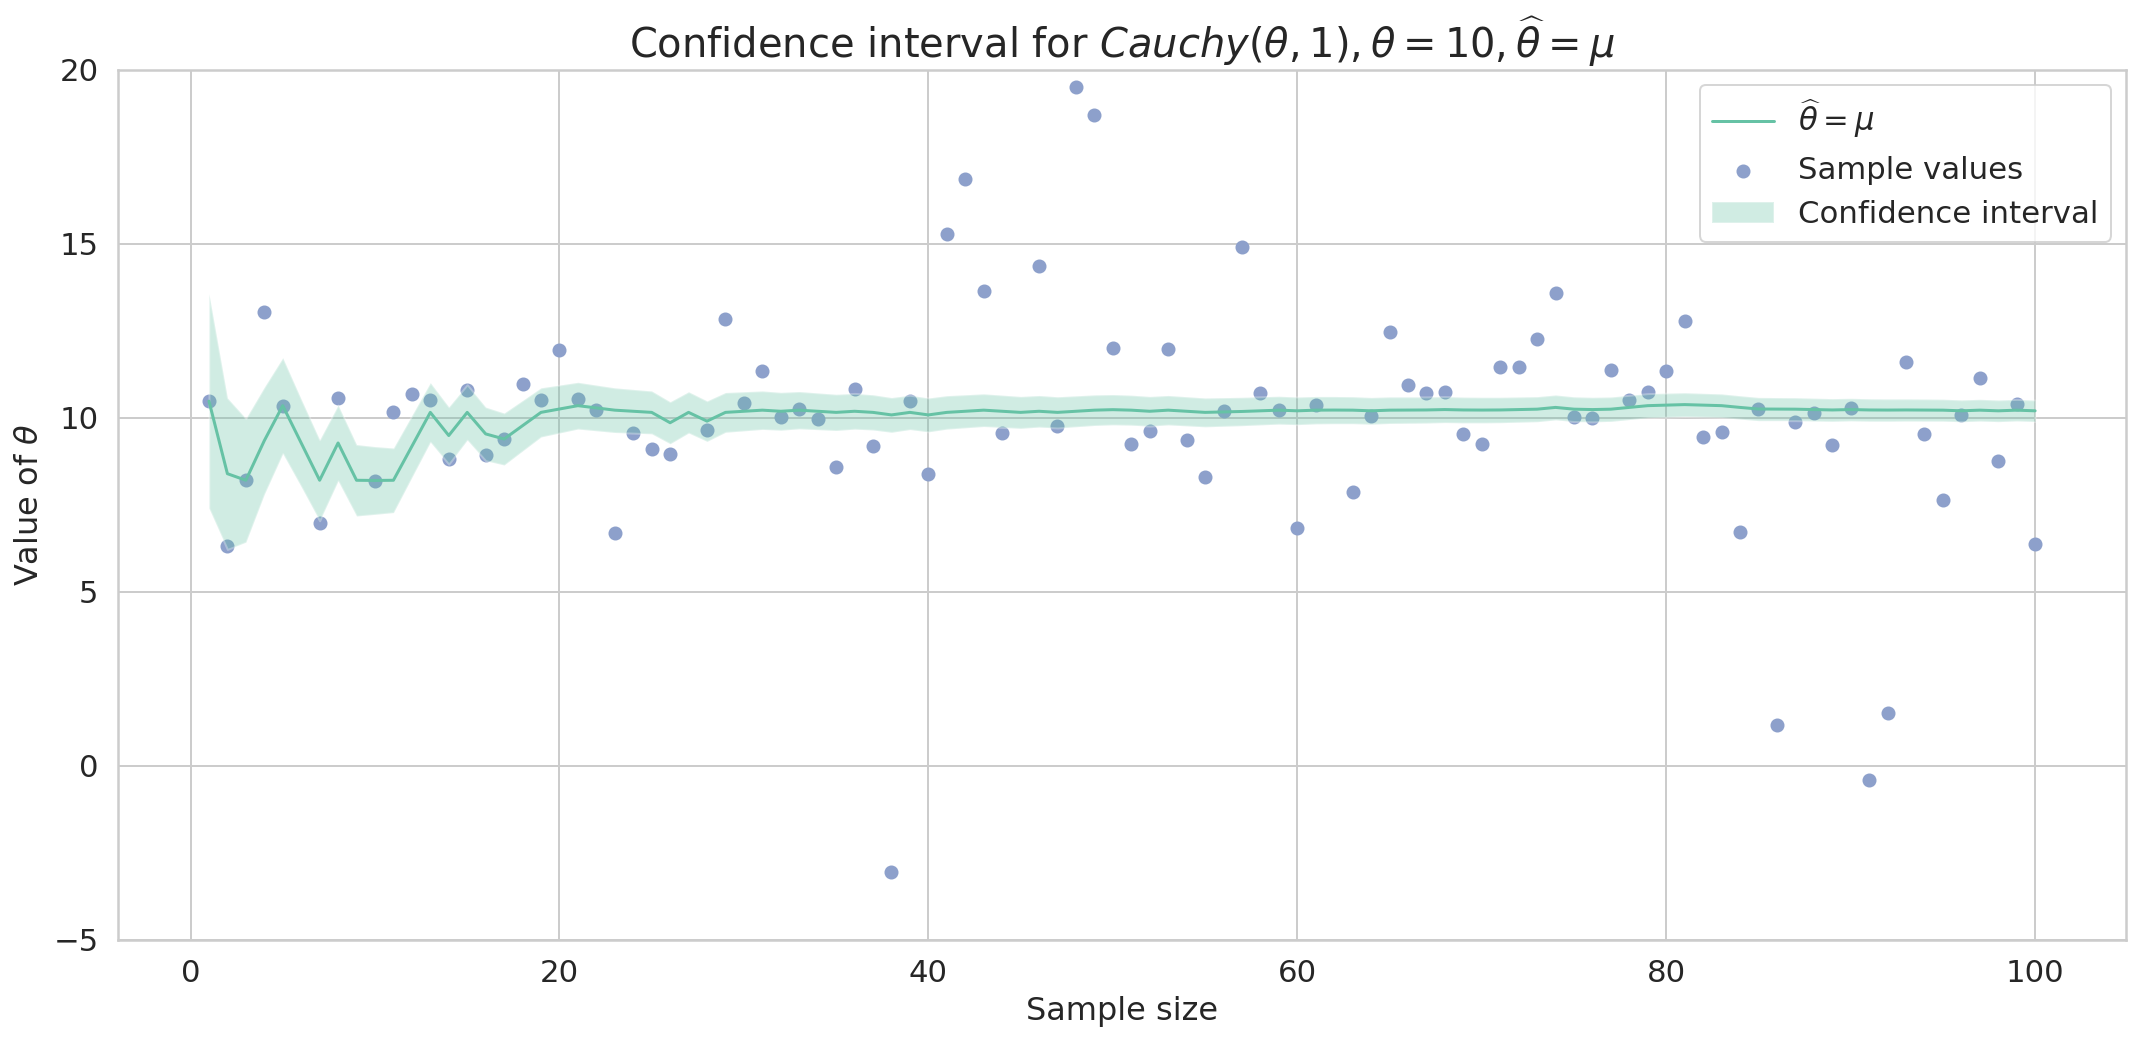

In [ ]:
draw_confidence_interval(
    sample,
    lambda sample: np.median(sample),
    ConfidenceInterval(
        lambda sample: np.median(sample) - np.pi/(2 * np.sqrt(len(sample))) * UPPER_NORM_QTL, 
        lambda sample: np.median(sample) - np.pi/(2 * np.sqrt(len(sample))) * LOWER_NORM_QTL
    ),
    title=r'$Cauchy(\theta, 1), \theta = 10, \widehat{\theta} = \mu$',
    label=r'$\widehat{\theta} = \mu$',
    y_lims=(-5, 20),
)

### 3. Распределение Пуассона, $\theta = 10$, оценка $\widehat{\theta} = \overline{X}$

Пусть $X_1, X_2, \dots, X_n$ выборка из распределения Пуассона $Pois(\theta)$. 
Тогда доверительный интервал уровня доверия $\alpha$ для параметра $\theta$, используя оценку $\widehat{\theta} = \overline{X}$, имеет вид:
$$
(T_1 = \overline{X} -\sqrt{\frac{\overline{X}}{n}}u_{\frac{1+\alpha}{2}}; T_2 = \overline{X} - \sqrt{\frac{\overline{X}}{n}}u_{\frac{1-\alpha}{2}})
$$   
где $u_{\omega} - \omega$ квантиль нормального распределения $\mathcal{N}(0, 1)$.

In [ ]:
sample = sps.poisson(THETA).rvs(size=N)

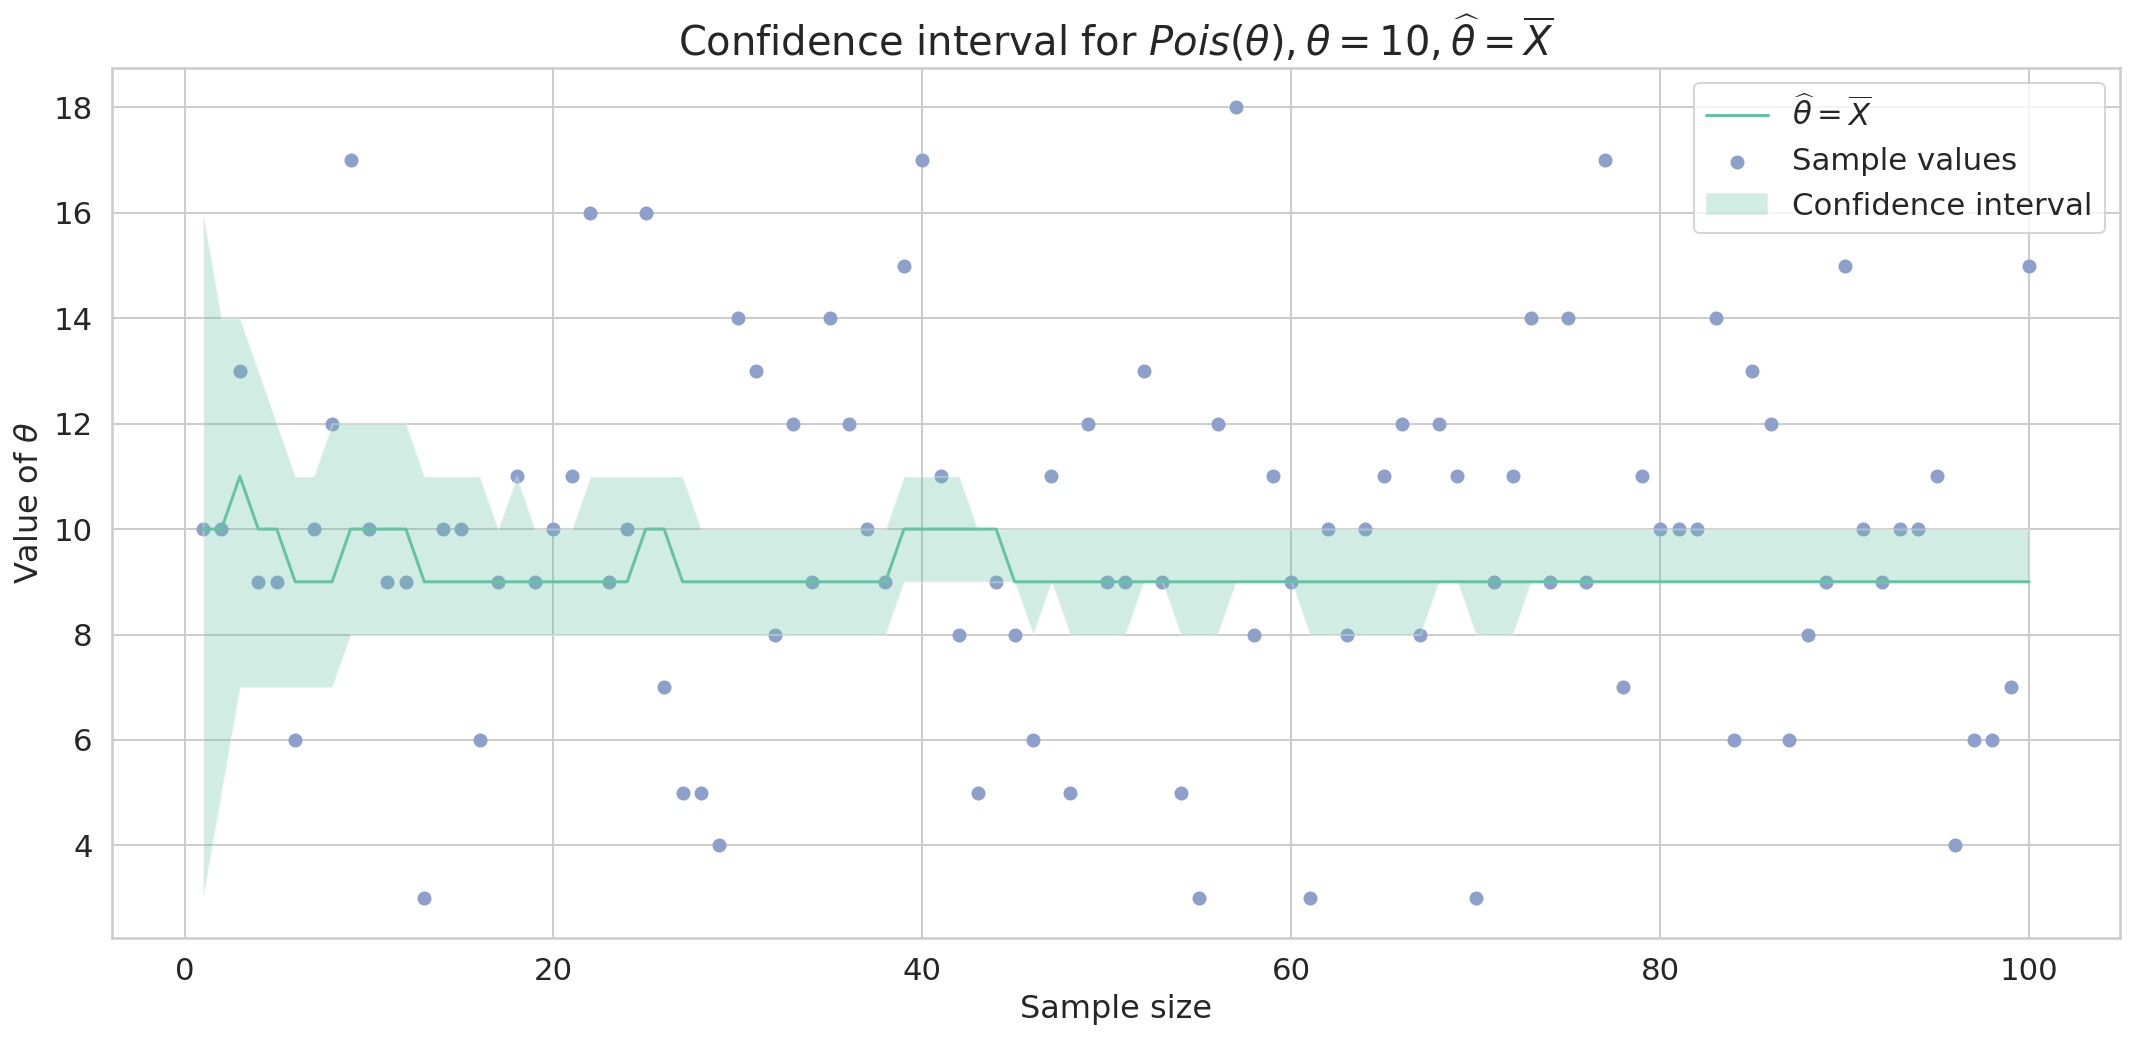

In [ ]:
draw_confidence_interval(
    sample,
    lambda sample: np.mean(sample),
    ConfidenceInterval(
        lambda sample: np.mean(sample) - np.sqrt(np.mean(sample) / len(sample)) * UPPER_NORM_QTL, 
        lambda sample: np.mean(sample) - np.sqrt(np.mean(sample) / len(sample)) * LOWER_NORM_QTL
    ),
    title=r'$Pois(\theta), \theta = 10, \widehat{\theta} = \overline{X}$',
    label=r'$\widehat{\theta} = \overline{X}$',
    # y_lims=(-5, 20),
)

### 4. Гамма-распределение, $(\theta, \lambda) = (10, 3)$, $\lambda$ известна

Пусть $X_1, X_2, \dots, X_n$ выборка из Гамма-распределения $Gamma(\theta, \lambda)$.

Тогда доверительный интервал уровня доверия $\alpha$ для параметра $\theta$, считая $\lambda$ известной величиной и используя оценку $\widehat{\theta} = \lambda\overline{X}$, имеет вид:
$$
(T_1 = \lambda\overline{X} - \sqrt{\frac{\lambda\overline{X}}{n}}u_{\frac{1+\alpha}{2}}; T_2 = \lambda\overline{X} - \sqrt{\frac{\lambda\overline{X}}{n}}u_{\frac{1-\alpha}{2}})
$$   
где $u_{\omega} - \omega$ квантиль нормального распределения $\mathcal{N}(0, 1)$.

In [ ]:
LAMBDA = 3

In [ ]:
sample = sps.gamma.rvs(size=N, a=THETA, scale=1/LAMBDA)

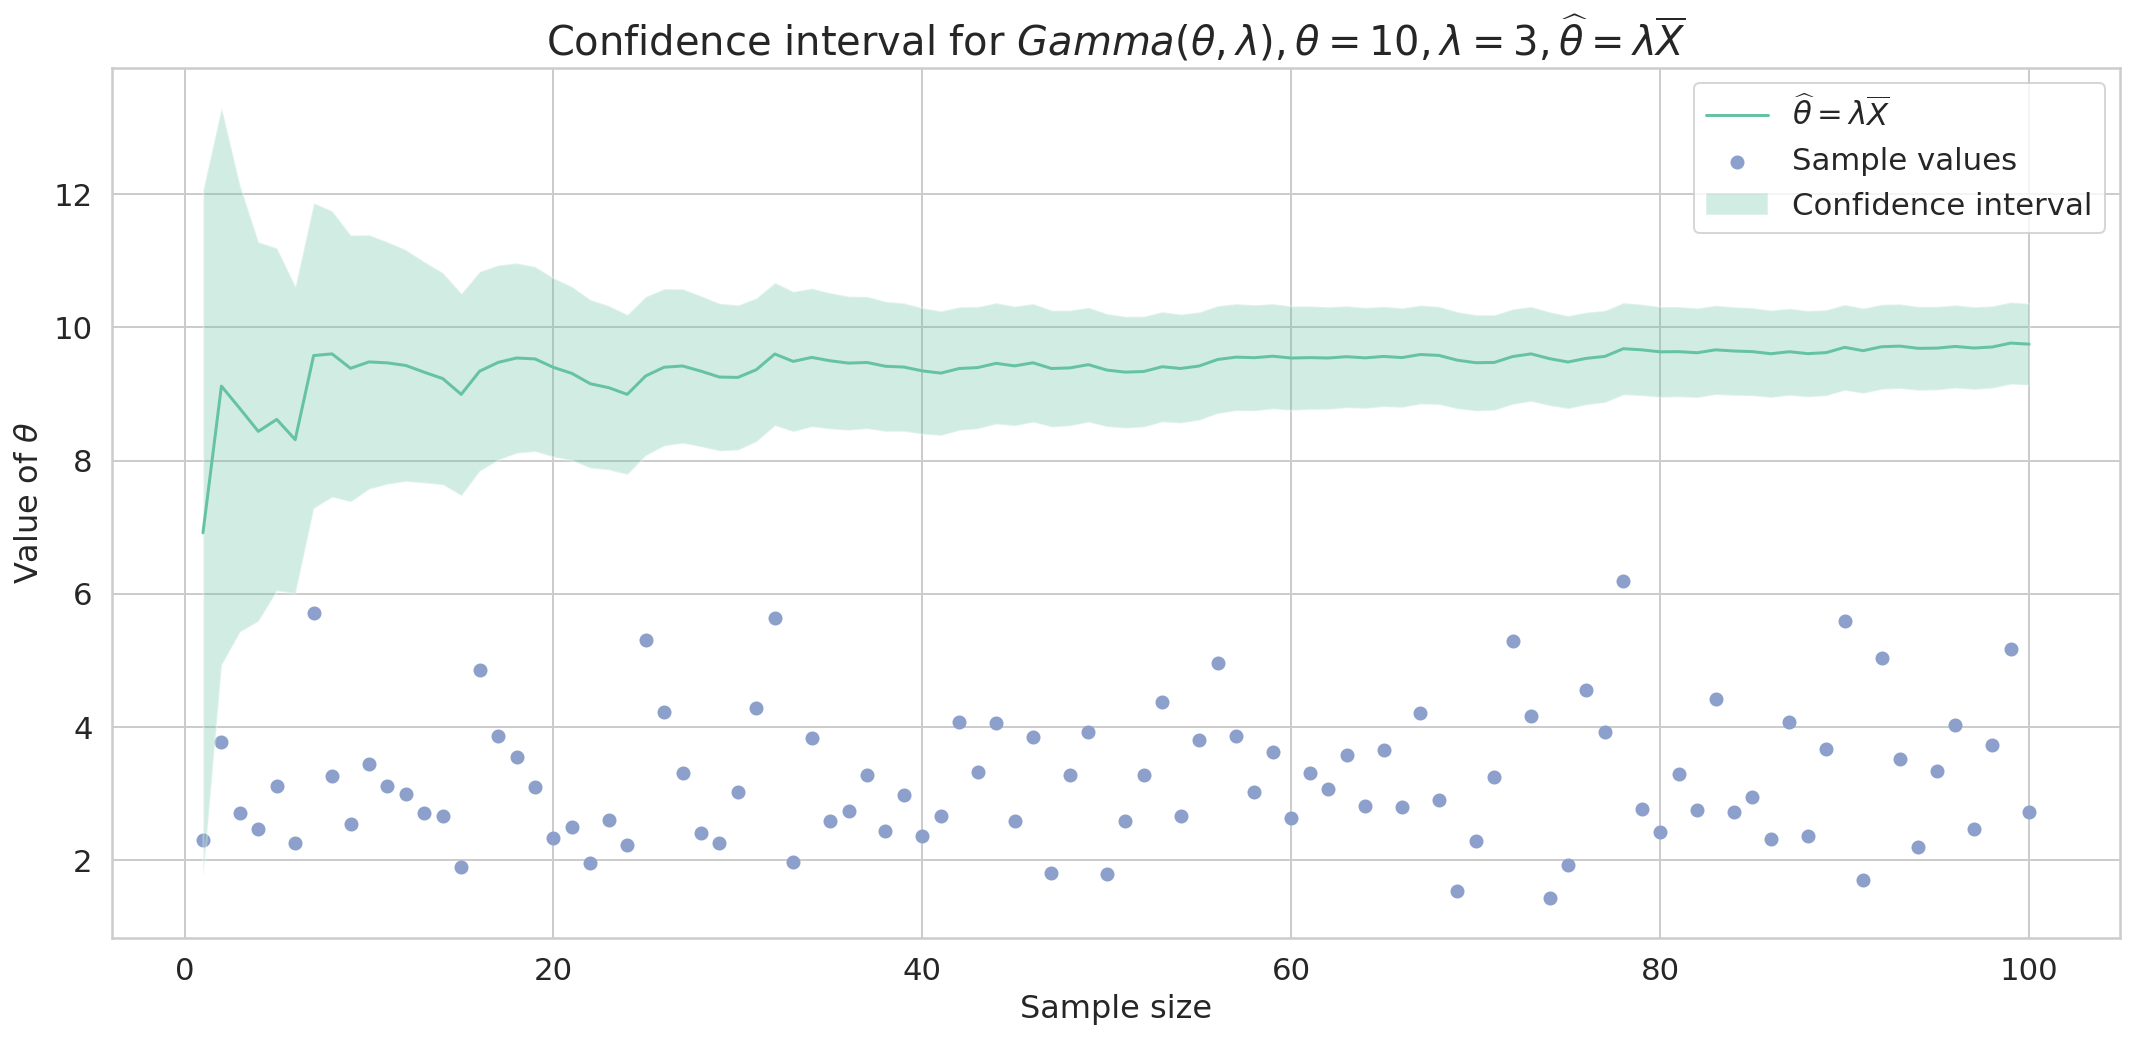

In [ ]:
draw_confidence_interval(
    sample,
    lambda sample: np.mean(sample) * LAMBDA,
    ConfidenceInterval(
        lambda sample: np.mean(sample) * LAMBDA - np.sqrt(np.mean(sample) / len(sample) * LAMBDA) * UPPER_NORM_QTL, 
        lambda sample: np.mean(sample) * LAMBDA - np.sqrt(np.mean(sample) / len(sample) * LAMBDA) * LOWER_NORM_QTL
    ),
    title=r'$Gamma(\theta, \lambda), \theta = 10, \lambda = 3, \widehat{\theta} = \lambda\overline{X}$',
    label=r'$\widehat{\theta} = \lambda\overline{X}$',
    # y_lims=(-5, 20),
)

Сделайте выводы о размерах и форме доверительных интервалов для каждого случая.

1. `Равномерное распределение`. При $n$ меньше 20 из графика видно, что ширина интервала (его верхняя граница) слишком большая. Однако при больших $n$ эта разница уже не так сильно проявляется и верхняя граница начинает "прижиматься к нижней".
2. `Распределение Коши`. При всех $n$ имеет небольшую ширину, что очень хорошо, а так как интервал еще и асимптотический, то при больших $n$ он все ближе прижимается к графику для оценки параметра.
3. `Распределение Пуассона`. График выглядит урывисто, при малых $n$ имеет досточно большую ширину, однако при этом при всех как кажется из графика содержит реальное значение параметра. После того как размер выборки становится примерно 50 сам интервал стабилизируется и не меняется до самого конца графика.
4. `Гамма распределение`. По ощущению имеет самую большую (среднюю по всем нарисованным $n$) ширину, то есть даже при $n$ порядка 100 все равно имеет приличную ширину. Однако при этом, кажется, что при всех $n$ содержит истинное значение параметра. 

# Задача 2

Для $n = 100$ оцените для кажого пункта предыдущей задачи вероятность попадания истинного значения
$\theta$ в интервал. Для этого нужно сделать слудующее:
1. Сгенерируйте достаточно много выборок из $P_{\theta}$
2. Постройте по каждой из них интервалы для $\widehat{\theta}$
3. Определите, сколько раз истинное значение $\theta.$ попадает в построенные интервалы. Таким способом будет
построена бернуллиевская выборка, по ней оцените вероятность.

Предположите, какое количество выборок нужно взять. Обоснуйте свой выбор.

__Ответ:__ Из постановки получается, что мы хотим оценить параметр $\theta$ по выборке из распределения $Bern(\theta)$. Неточный доверительный интервал для параметра $\theta$ уровня доверия $\alpha$ для оценки $\widehat\theta=\overline{Х}$ выглядит следующим образом:
$$
(T_1 = \overline{X} - \frac{1}{\sqrt{4n(1-\alpha)}}; T_2 = \overline{X} + \frac{1}{\sqrt{4n(1-\alpha)}})
$$
Если задаться вопросом – начиная с какого $n$ при заданном уровне доверия (возьмем $\alpha=0.95$) ширина интервала будет меньше $l$, то можно будет получить условие на количество выборок $P_\theta$. 

Выберем подходящее нам $l$, считаю, что ширина $l=0.1$ достаточна, чтобы быть уверенным в честности получаемых вероятностей. Отсюда получаем что при наших ограничениях $n>500$.

In [ ]:
ITERATIONS_COUNT=500

In [ ]:
def estimate_probability_for_ci(distribution, ci: ConfidenceInterval, 
                                real_value: float) -> float:
  got_bounded = 0
  for i in range(1, ITERATIONS_COUNT):
    new_sample = distribution.rvs(size=N)
    lower_ci_vals = apply_func_on_prefixes(new_sample, ci.lower)
    upper_ci_vals = apply_func_on_prefixes(new_sample, ci.upper)
    got_bounded += np.count_nonzero(np.logical_and(lower_ci_vals <= real_value, real_value <= upper_ci_vals))
  return got_bounded / (i * N)

### Равномерное распределение

In [ ]:
estimate_probability_for_ci(
    sps.uniform(loc=0, scale=THETA),
    ConfidenceInterval(
        lambda sample: sample.max(), 
        lambda sample: sample.max() / np.power(1 - ALPHA, 1 / len(sample))
    ),
    THETA,
)

0.9471943887775551

### Распределение Коши

In [ ]:
estimate_probability_for_ci(
    sps.cauchy(loc=THETA, scale=1),
    ConfidenceInterval(
        lambda sample: np.median(sample) - np.pi/(2 * np.sqrt(len(sample))) * UPPER_NORM_QTL, 
        lambda sample: np.median(sample) - np.pi/(2 * np.sqrt(len(sample))) * LOWER_NORM_QTL
    ),
    THETA,
)

0.9300801603206413

### Распределение Пуассона

In [ ]:
estimate_probability_for_ci(
    sps.poisson(THETA),
    ConfidenceInterval(
        lambda sample: np.mean(sample) - np.sqrt(np.mean(sample) / len(sample)) * UPPER_NORM_QTL, 
        lambda sample: np.mean(sample) - np.sqrt(np.mean(sample) / len(sample)) * LOWER_NORM_QTL
    ),
    THETA,
)

0.9756312625250501

### Гамма-распределение

In [ ]:
estimate_probability_for_ci(
    sps.gamma(a=THETA, scale=1/LAMBDA),
    ConfidenceInterval(
        lambda sample: np.mean(sample) * LAMBDA - np.sqrt(np.mean(sample) / len(sample) * LAMBDA) * UPPER_NORM_QTL, 
        lambda sample: np.mean(sample) * LAMBDA - np.sqrt(np.mean(sample) / len(sample) * LAMBDA) * LOWER_NORM_QTL
    ),
    THETA,
)

0.9508817635270541

Сделайте выводы.

Значения вероятности попадания в доверительный интервал получились очень близкими к требуемому уровню доверия.

# Задача 3

В этой задаче мы построим точный и асимптотический доверительный интевалы для нормального распределения и сравним их.

Пусть $X_1, \dots, X_n$ — выборка из нормального распределения со средним $a$ и дисперсией $\sigma^2$, причем $\sigma$ неизвестна. Выпишите формулы

* точного доверительного итервала уровня доверия $\alpha$ для $a$:

* асимптотического доверительного итервала уровня доверия $\alpha$ для $a$


Точный доверительный интервал: 
$$
(T_1; T_2) = (\overline{X} - \frac{S}{\sqrt{n - 1}}T_{n-1,\frac{1+\alpha}{2}}; \overline{X} - \frac{S}{\sqrt{n - 1}}T_{n-1,\frac{1-\alpha}{2}})
$$

Асимптотический доверительный интервал: 
$$
(T_1^n; T_2^n) = (\overline{X} - \frac{S}{\sqrt{n}}u_{\frac{1+\alpha}{2}}; \overline{X} - \frac{S}{\sqrt{n}}u_{\frac{1-\alpha}{2}})
$$
где $u_\omega - \omega$ квантиль нормального распределения $\mathcal{N}(0, 1)$, а $T_{n-1, \omega} - \omega $ квантиль распределения Стьюдента с $n-1$ степенью свободы.

Для $n=30, \,a = 0$ постройте __на одном графике__ точный и асимптотический доверительный интервал, а также отметьте линией истинное значение $a$

In [ ]:
N=30
A=0

In [ ]:
def calculate_conf_interval(
    sample: np.ndarray, 
    alpha: float = 0.95
) -> Tuple[np.array, np.array]:
    T_LOWER_BOUND, T_UPPER_BOUND = sps.t(df=len(sample)-1).ppf([(1 - alpha) / 2,(1 + alpha) / 2])
    lower_ci_vals = apply_func_on_prefixes(
        sample, 
        lambda x: np.mean(x) - np.sqrt(np.var(x) / (len(x) - 1)) * T_UPPER_BOUND, except_n=1)
    upper_ci_vals = apply_func_on_prefixes(
        sample, 
        lambda x: np.mean(x) - np.sqrt(np.var(x) / (len(x) - 1)) * T_LOWER_BOUND, except_n=1)
    return lower_ci_vals, upper_ci_vals

In [ ]:
def calculate_asymptotic_conf_interval(
    sample: np.ndarray, 
    alpha: float = 0.95
) -> Tuple[np.array, np.array]:
    """Вычисление асимптотического доверительного интервала уровня доверия alpha. """
    NORM_LOWER_BOUND, NORM_UPPER_BOUND = sps.norm.ppf([(1 - alpha) / 2,(1 + alpha) / 2])
    lower_ci_vals = apply_func_on_prefixes(
        sample, 
        lambda x: np.mean(x) - np.sqrt(np.var(x) / len(x)) * NORM_UPPER_BOUND)
    upper_ci_vals = apply_func_on_prefixes(
        sample, 
        lambda x: np.mean(x) - np.sqrt(np.var(x) / len(x)) * NORM_LOWER_BOUND)
    return lower_ci_vals, upper_ci_vals

In [ ]:
def draw_ci_comparision(sample: np.array, alpha: float = 0.95):
  fig, axis = plt.subplots(figsize=(18,8))
  plt.title(r'Asymptotic and Precise confidence interval for expectation comparison, ' + 
            r'$\mathcal{N}(a, \sigma^2), a = 0, \sigma=1$', fontsize=20)
  grid = np.arange(len(sample)) + 1

  estimation_values = apply_func_on_prefixes(sample, lambda x: np.mean(x))
  lower_prc_ci_vals, upper_prc_ci_vals = calculate_conf_interval(sample, alpha)
  lower_as_ci_vals, upper_as_ci_values = calculate_asymptotic_conf_interval(sample, alpha)


  axis.plot(grid, estimation_values, label=r'$\overline{X}$')
  plt.hlines(A, xmin=0, xmax=len(sample), color='r', label='Real value')
  
  plt.fill_between(x=grid, y1=lower_prc_ci_vals, y2=upper_prc_ci_vals, alpha=0.3,
                  label='Precise Confidence interval')
  plt.fill_between(x=grid, y1=lower_as_ci_vals, y2=upper_as_ci_values, alpha=0.3,
                  label='Asymptotic Confidence interval')

  axis.set_xlabel('Sample size', fontsize=16)
  axis.set_ylabel(r'Value of $\theta$', fontsize=16)
  plt.legend()
  plt.show()

In [ ]:
sample_norm = sps.norm(loc=A).rvs(size=N)

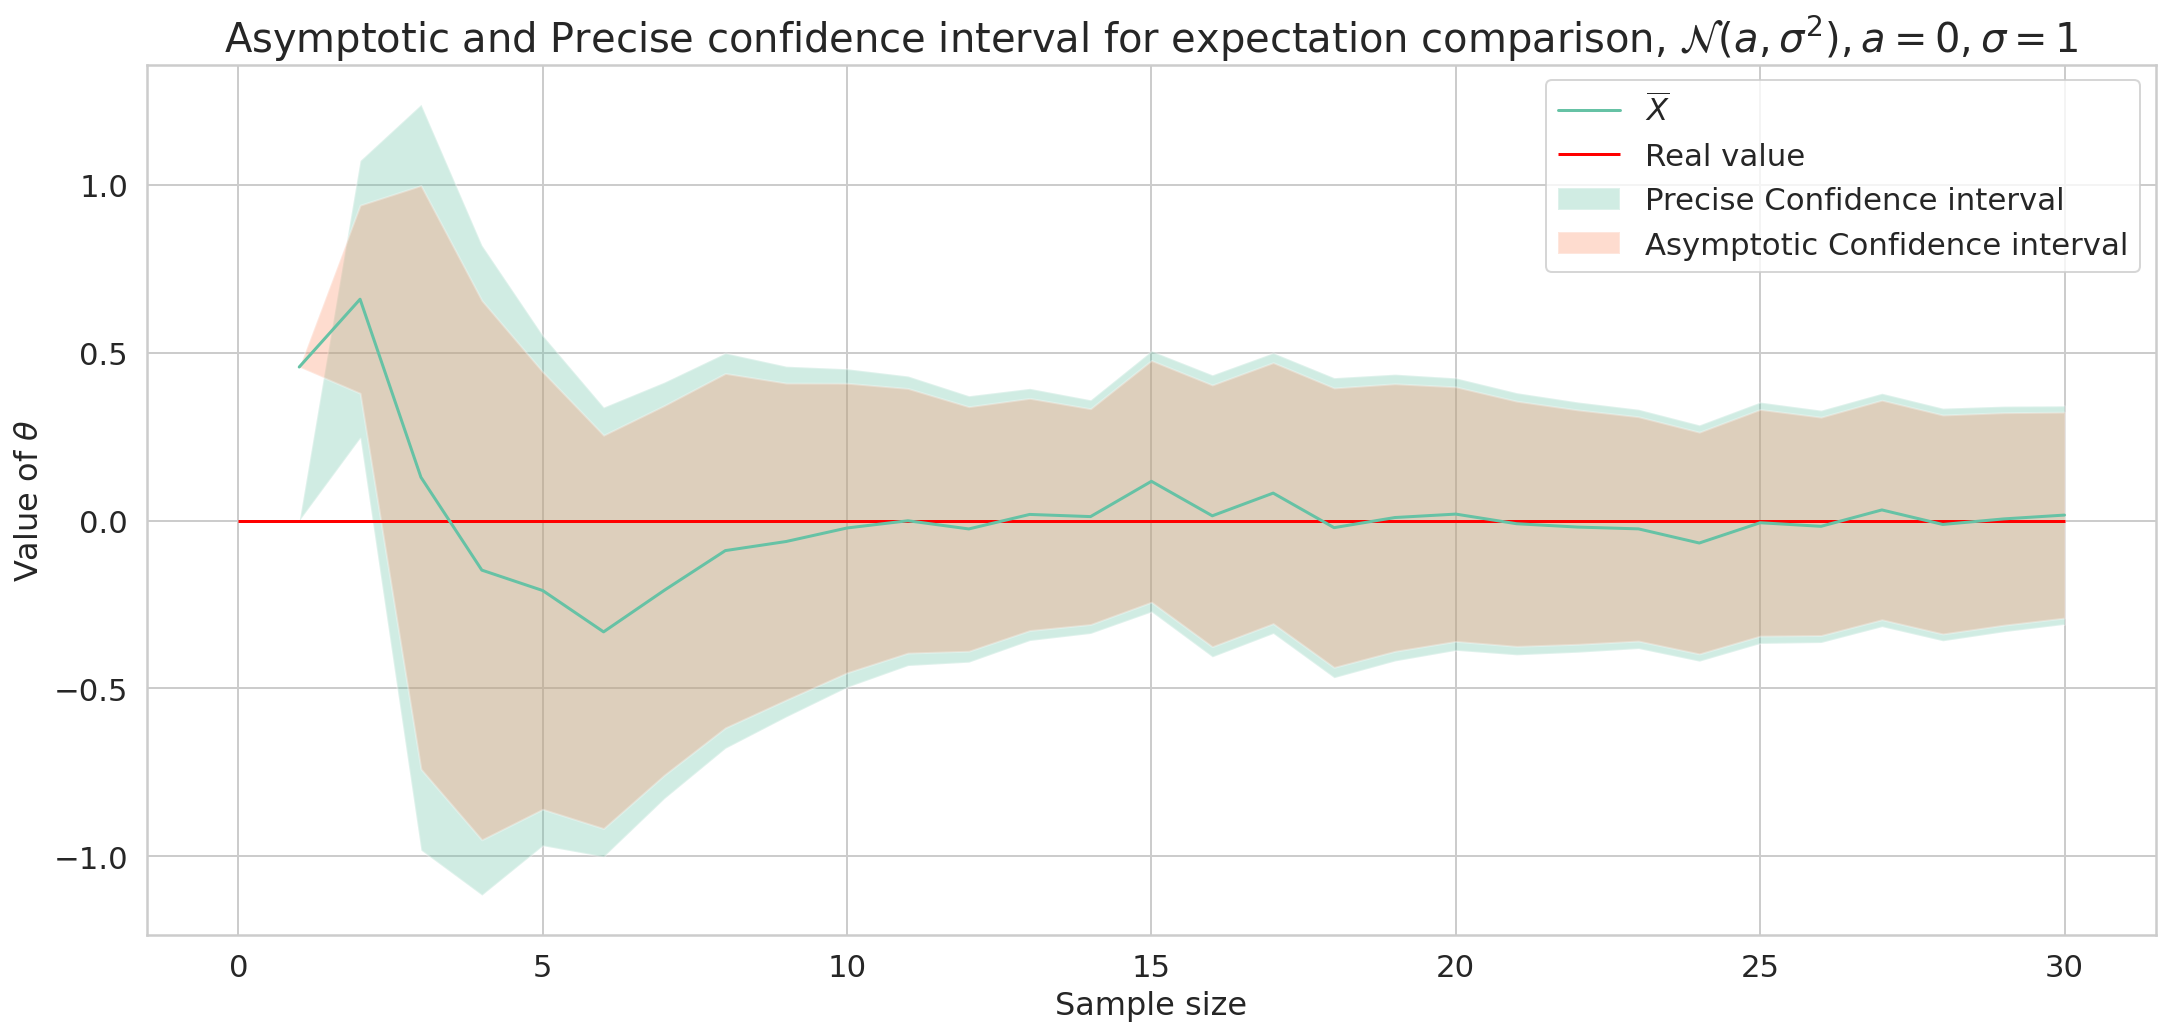

In [ ]:
draw_ci_comparision(sample_norm)

Сделайте выводы. В каких случаях уместно использовать асимптотический интервал вместо точного?

**Вывод** Как мы видим из графика точный интервал содержит в себе асимптотический, так как во-первых в знаменателе границ точного интервала стоит $\sqrt{n-1}$, а не $\sqrt{n}$. Во-вторых влияет еще и то что мы берем квантили распределения Стьюдента, у него тяжелее хвосты, поэтому соответствующая квантиль больше чем квантиль для нормального распределения. 

Однако как мы видим с увелечением $n$ разница в ширине интервалов становится все меньше и меньше. Так происоходит из-за того, что во-первых:
$$ 
\lim_{n\to\infty} \frac{1}{\sqrt{n-1}}  = \lim_{n\to\infty}\frac{1}{\sqrt{n}}$$ 
А во-вторых: $T_{n-1} \xrightarrow{d} \mathcal{N}$ при $n\rightarrow\infty$.


При n = 30 условие ЦПТ применимо с хорошей точностью. Поэтому при $n \geq 30$
имеет смысл пользоваться асимптотическими доверительными интервалами.

Возможно асимптотический интервал уместно использовать в случае, если ширина интервала сильно важна, хотя при больших n это теряет смысл потому что тогда ширина будет примерно одинаковая.

# Задача 4

В этой задаче мы проанализируем изменение индекса качества воздуха (air quality index, AQI) для двух мегаполисов Индии за последние годы. Данные взяты с Kaggle (https://www.kaggle.com/rohanrao/air-quality-data-in-india)

In [ ]:
!gdown https://drive.google.com/uc?id=1Y_mE_jlEF82UDf41l1LFMDHX_LHvF2SC 

Downloading...
From: https://drive.google.com/uc?id=1Y_mE_jlEF82UDf41l1LFMDHX_LHvF2SC
To: /content/city_day.csv
100% 2.57M/2.57M [00:00<00:00, 81.5MB/s]


Загрузите файл `city_day.csv`. Нам понадобятся столбцы `City`, `Date` и `AQI`. При этом учтите, что:
* В дальнейшем мы будем работать с датами, поэтому используйте аргумент `parse_dates` чтобы корректо их распарсить
* Данные содержат пропуски, которые нужно удалить

In [ ]:
df = pd.read_csv('city_day.csv', parse_dates=['Date'])
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
df = df.dropna(subset=['City', 'Date', 'AQI'])
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
28,Ahmedabad,2015-01-29,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor
29,Ahmedabad,2015-01-30,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor
30,Ahmedabad,2015-01-31,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
31,Ahmedabad,2015-02-01,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe
32,Ahmedabad,2015-02-02,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe


In [ ]:
df[['City', 'Date', 'AQI']].isna().sum()

City    0
Date    0
AQI     0
dtype: int64

Для удобства сохраните в отдельные поля `Month` и `Year` соответственно год и месяц, когда производились замеры

In [ ]:
df['Month'] = df.Date.apply(lambda x: x.month)
df['Year'] = df.Date.apply(lambda x: x.year)
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Month,Year
28,Ahmedabad,2015-01-29,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor,1,2015
29,Ahmedabad,2015-01-30,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor,1,2015
30,Ahmedabad,2015-01-31,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe,1,2015
31,Ahmedabad,2015-02-01,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe,2,2015
32,Ahmedabad,2015-02-02,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe,2,2015


Нас будут интересовать два города: Мумбаи (Mumbai) и Калькутта (Kolkata). Сохраните данные по этим двум городам для всех днней с 1 июля 2018 года включительно

In [ ]:
mumbai = df.query('City == \'Mumbai\' & (Year > 2018  |  (Year == 2018  & Month >= 7))')
kolkata = df.query('City == \'Kolkata\' & (Year > 2018  |  (Year == 2018  & Month >= 7))')
mumbai.head(3)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Month,Year
23132,Mumbai,2018-07-01,13.00,48.23,28.19,21.22,49.41,NaN,1.49,19.40,22.08,0.82,NaN,NaN,88.0,Satisfactory,7,2018
23133,Mumbai,2018-07-02,13.78,48.89,30.97,22.09,53.06,NaN,1.37,15.46,22.38,0.55,NaN,NaN,77.0,Satisfactory,7,2018
23134,Mumbai,2018-07-03,18.50,65.24,37.75,25.39,63.13,NaN,1.49,18.02,26.45,0.54,NaN,NaN,89.0,Satisfactory,7,2018


В предыдущих задачах мы строили доверительные интервалы в предположении, что выборка взята из параметрического семейства распределений. Но что делать в случае, когда подобное предположение сделать нельзя? Оказывается, в этом случае можно строить доверительный интервал с помощью бутстрепа.

Пусть $X_1, \dots, X_n$ — выборка, для которой мы хотим оценить некоторую величину $\theta$. Построим $k$ бутстепных выборок, и получим по ним оценки $\theta^*_1, \dots, \theta^*_k$. Отсортируем их, чтобы получить вариационный ряд $\theta^*_{(1)}, \dots, \theta^*_{(k)}$. Тогда получим, что
$$
C^* = \left(\theta^*_{(\lfloor k (1 - \alpha) / 2 \rfloor)},
\theta^*_{(\lceil k (1 + \alpha) / 2 \rceil)} \right)
$$
будет (приблизительным) доверительным интервалом для $\theta$ уровня доверия $\alpha$.

Для каждого месяца с июля 2018 по июнь 2020 включтельно постройте бутстрепный доверительный интервал для __среднего значения AQI__. В этом вам помогут следующие вспомогательные функции:

In [ ]:
def get_dataset_by_month(
    df: pd.DataFrame, 
    year: int,
    month: int
):
    """ Сохранение в массив данные для указанного месяца и года."""
    return df.query(f'Year == {year} & Month == {month}')  # .  Year < {year} | (Year == {year}  & Month <= {month})

In [ ]:
def get_bootstrap_samples(
    sample: np.ndarray,
    k: int = 1000
):
    """ Построение k бутстрепных выборок для указанной выборки. """
    return np.random.choice(sample, (k, len(sample)))

In [ ]:
def bootstrap_conf_interval(
    sample: np.ndarray,
    estimator: Callable = lambda x: np.mean(x, axis=-1),
    alpha: float = 0.95,
):
    """ Построение бутстрепных доверительных интервалов. """
    btstr_samples = get_bootstrap_samples(sample)

    estims_array = np.sort(np.apply_along_axis(
        lambda row: estimator(row),
        axis=1, 
        arr=btstr_samples))
    lower_bound = int(np.floor(len(estims_array) * (1 - alpha) / 2))
    upper_bound = min(int(np.ceil(len(estims_array) * (1 + alpha) / 2)), len(estims_array) - 1)
    return estims_array[lower_bound], estims_array[upper_bound]

Постройте на одном графике доверительные интервалы для Мумбаи и Калькутты. Также отметьте точками на графике истинный средний AQI и соедините точки линиями. Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

In [ ]:
kolkata_color = sns.color_palette('Set2')[0]
mumbai_color = sns.color_palette('Set2')[1]

In [ ]:
ym = mumbai[['Year', 'Month']].drop_duplicates().values[:-1]
labels = [f"{year}-{month}" for year, month in ym] # номера месяцев для подписей на графике 
print(labels)

['2018-7', '2018-8', '2018-9', '2018-10', '2018-11', '2018-12', '2019-1', '2019-2', '2019-3', '2019-4', '2019-5', '2019-6', '2019-7', '2019-8', '2019-9', '2019-10', '2019-11', '2019-12', '2020-1', '2020-2', '2020-3', '2020-4', '2020-5', '2020-6']


In [ ]:
def count_ci_for_period(df: pd.DataFrame, column_name_to_estimate: str, ym):
  lower_ci_vals = np.zeros(len(ym))
  upper_ci_vals = np.zeros(len(ym))
  real_means = np.zeros(len(ym))
  for i, (year, month) in enumerate(ym):
    sample = get_dataset_by_month(df, year, month)[column_name_to_estimate]
    lower_ci_vals[i], upper_ci_vals[i] = bootstrap_conf_interval(sample)
    real_means[i] = sample.mean()
  return lower_ci_vals, upper_ci_vals, real_means

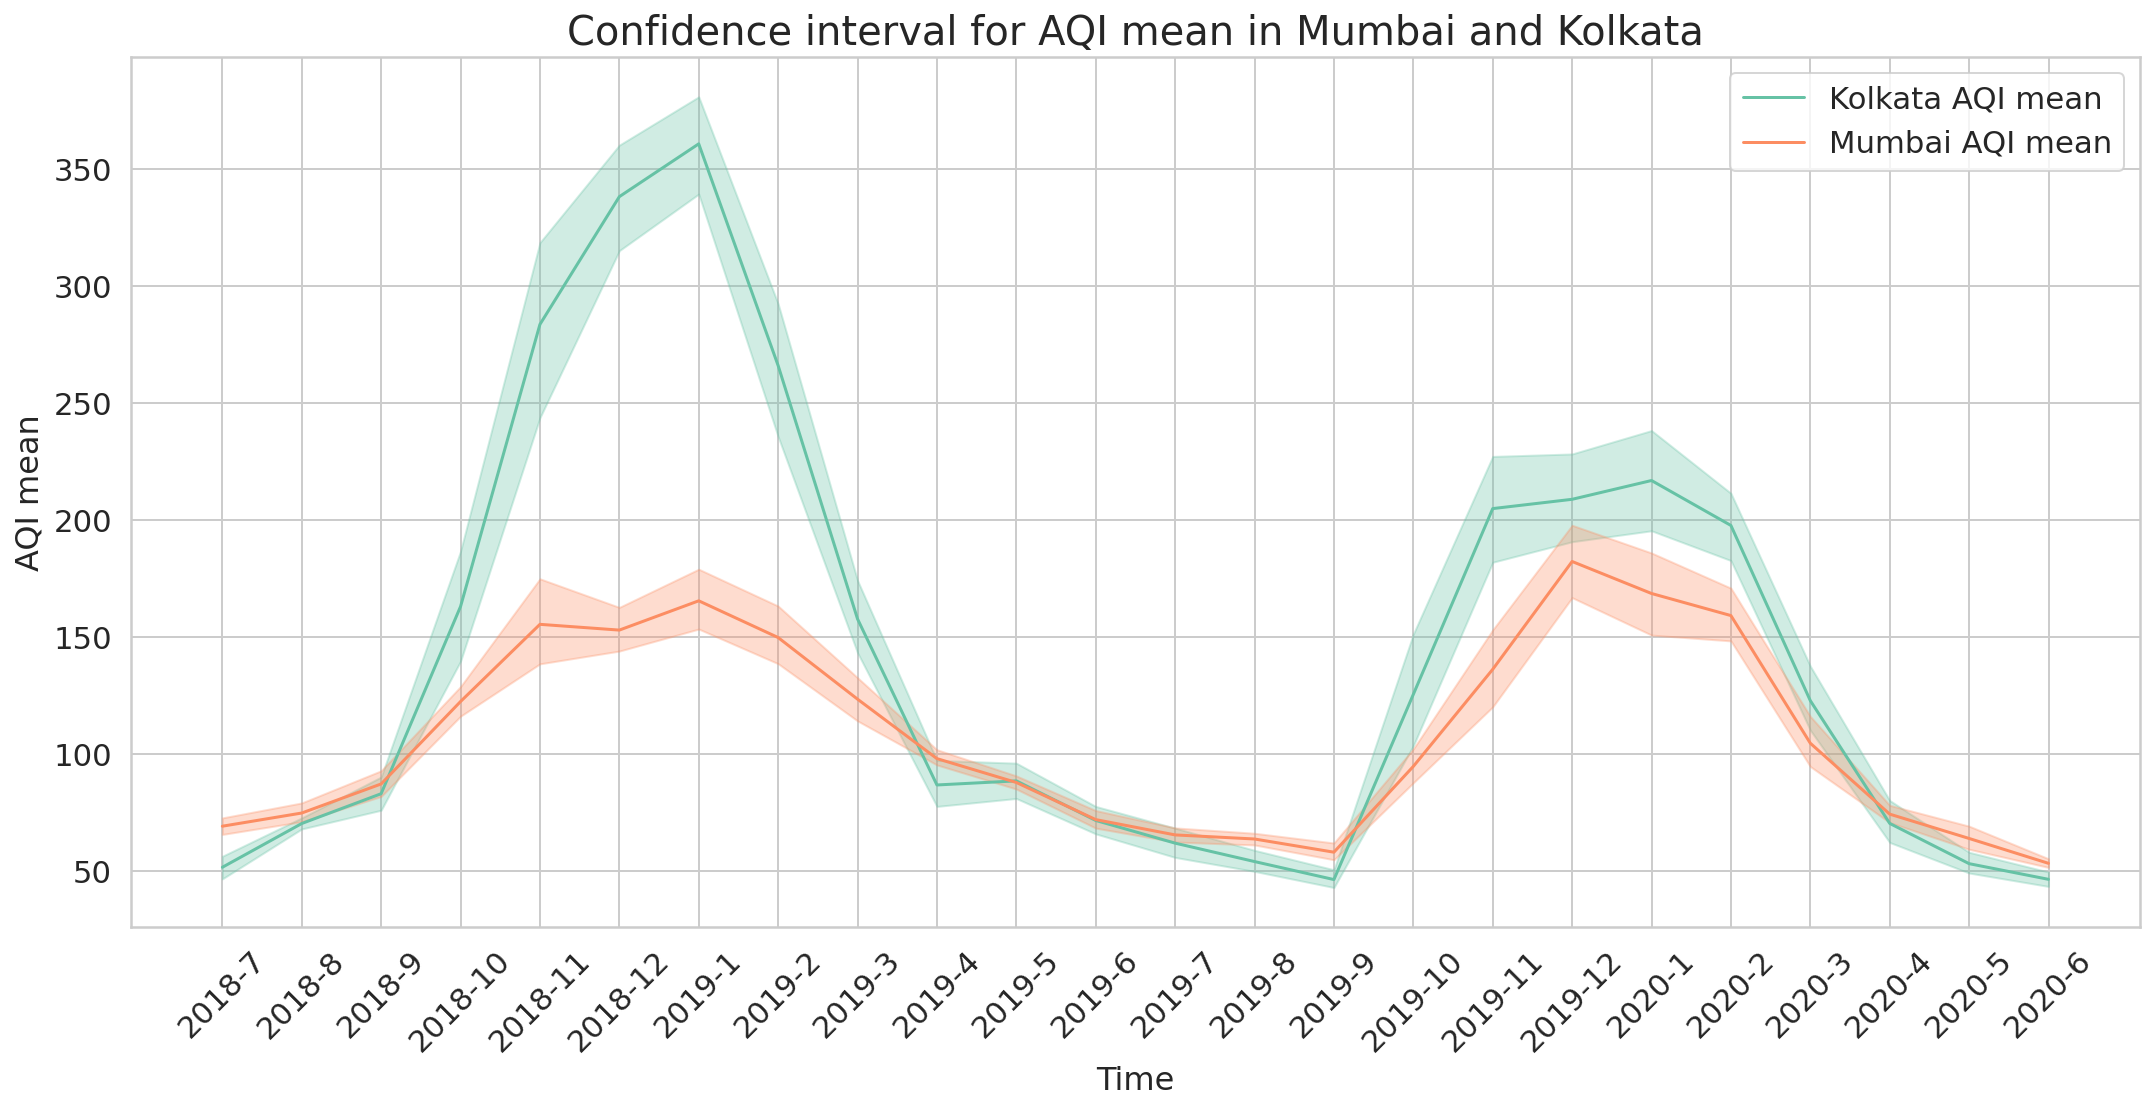

In [ ]:
fig, axis = plt.subplots(figsize=(18,8))
plt.title('Confidence interval for AQI mean in Mumbai and Kolkata', fontsize=20)
grid = np.arange(len(ym))

lower_ci_vals, upper_ci_vals, real_means = count_ci_for_period(kolkata, 'AQI', ym)
plt.plot(grid, real_means, label='Kolkata AQI mean', color=kolkata_color)
plt.fill_between(x=grid, y1=lower_ci_vals, y2=upper_ci_vals, alpha=0.3, color=kolkata_color)

lower_ci_vals, upper_ci_vals, real_means = count_ci_for_period(mumbai, 'AQI', ym)
plt.plot(grid, real_means, label='Mumbai AQI mean', color=mumbai_color)
plt.fill_between(x=grid, y1=lower_ci_vals, y2=upper_ci_vals, alpha=0.3, color=mumbai_color)

axis.set_xlabel('Time', fontsize=16)
axis.set_ylabel('AQI mean', fontsize=16)

axis.set_xticks(np.arange(len(ym)))
axis.set_xticklabels(labels)
plt.xticks(rotation=45)
plt.legend()
plt.show()

Посмотрите на получившийся график. Видны ли в нем какие-либо закономерности? С чем они могут быть связаны?

Из графика видны схожие тенденции у обоих городов по качеству воздуха. А именно оба в обоих городах к зиме качества воздуха сильно ухудшается о чем свидетельствует высокий AQI. А также заметно, что качество воздуха в 2019-2020 году лучше чем в 2018-2019.

Почему зимой качество воздуха в Индии сильно ухудшается? [Отвечает интернет.](https://www.dw.com/ru/kak-indii-reshit-problemu-rastushhego-zagrjaznenija-vozduha/a-59855384)
>Проблема загрязнения воздуха особенно остро стоит в начале зимы, когда выбросы предприятий тяжелой промышленности и угольных электростанций перемешиваются с дымом от сжигания сельскохозяйственных отходов в соседних штатах Харьяна, Пенджаб и Уттар-Прадеш. В результате Нью-Дели буквально задыхается от токсичного смога.
"Примерно 25-30% загрязнения воздуха приходится на сжигание стерни", - говорит DW Танушри Гангули, занимающаяся исследованием качества воздуха в Совете по энергетике, окружающей среде и воде (CEEW) в Нью-Дели. "Но когда наступает зима, многие люди, которые не имеют дома электронагревателей, начинают обогревать помещения с помощью биомассы" - добавляет она, имея в виду древесину, коровий навоз и сельскохозяйственные отходы. По мнению Гангули, город нуждается в "более масштабном" уменьшении выбросов в атмосферу всех источников загрязнения, особенно в зимний период.


Однако как мы видим зимой 2019-2020 качество воздуха намного лучше чем в тот же промежуток зимой 2018-2019. [И снова отвечает интернет.](https://timesofindia.indiatimes.com/city/kolkata/air-quality-in-2019-winter-better-than-previous-years/articleshow/73218818.cms)  


Теперь давайте сравним качество воздуха в апреле 2019 и апреле 2020 годов. Постройте __на одном графике__
* доверительные интервалы для апреля 2019 и апреля 2020 для Мумбаи
* истинные средние значения (с помощью `plt.hlines`)
* точки выборки

Проследите за тем, чтобы графики, относящиеся к одному году, были одного цвета.

In [ ]:
color_in_2019 = sns.color_palette('Set2')[0]
color_in_2020 = sns.color_palette('Set2')[1]

In [ ]:
from typing import List

In [ ]:
def compare_aqi_in_month_by_year(
    df: pd.DataFrame, month_num: int, years: List[int], month_str: str, 
    days_in_month: int, title: str, year_color: list()):
  fig, axis = plt.subplots(figsize=(18,8))
  plt.title(title, fontsize=20)
  grid = np.arange(days_in_month) + 1

  for i, year in enumerate(years):
    sample = get_dataset_by_month(df, year, month_num)
    lower_ci_val, upper_ci_val = bootstrap_conf_interval(sample['AQI'])
    real_mean = np.mean(sample.AQI)

    plt.scatter(
        sample.Date.apply(lambda x: x.day), sample['AQI'], 
        label=f'AQI in {month_str} {str(year)}', color=year_color[i]
    )
    
    plt.fill_between(
        x=grid, y1=lower_ci_val, y2=upper_ci_val, alpha=0.3, 
        color=year_color[i], label=f'CI for  AQI in {month_str} {str(year)}'
    )
    
    plt.hlines(
        [lower_ci_val, upper_ci_val, real_mean], 
        xmin=1, xmax=days_in_month, color=year_color[i]
    )

  axis.set_xlabel('Time', fontsize=16)
  axis.set_ylabel('AQI mean', fontsize=16)

  plt.legend()
  plt.show()

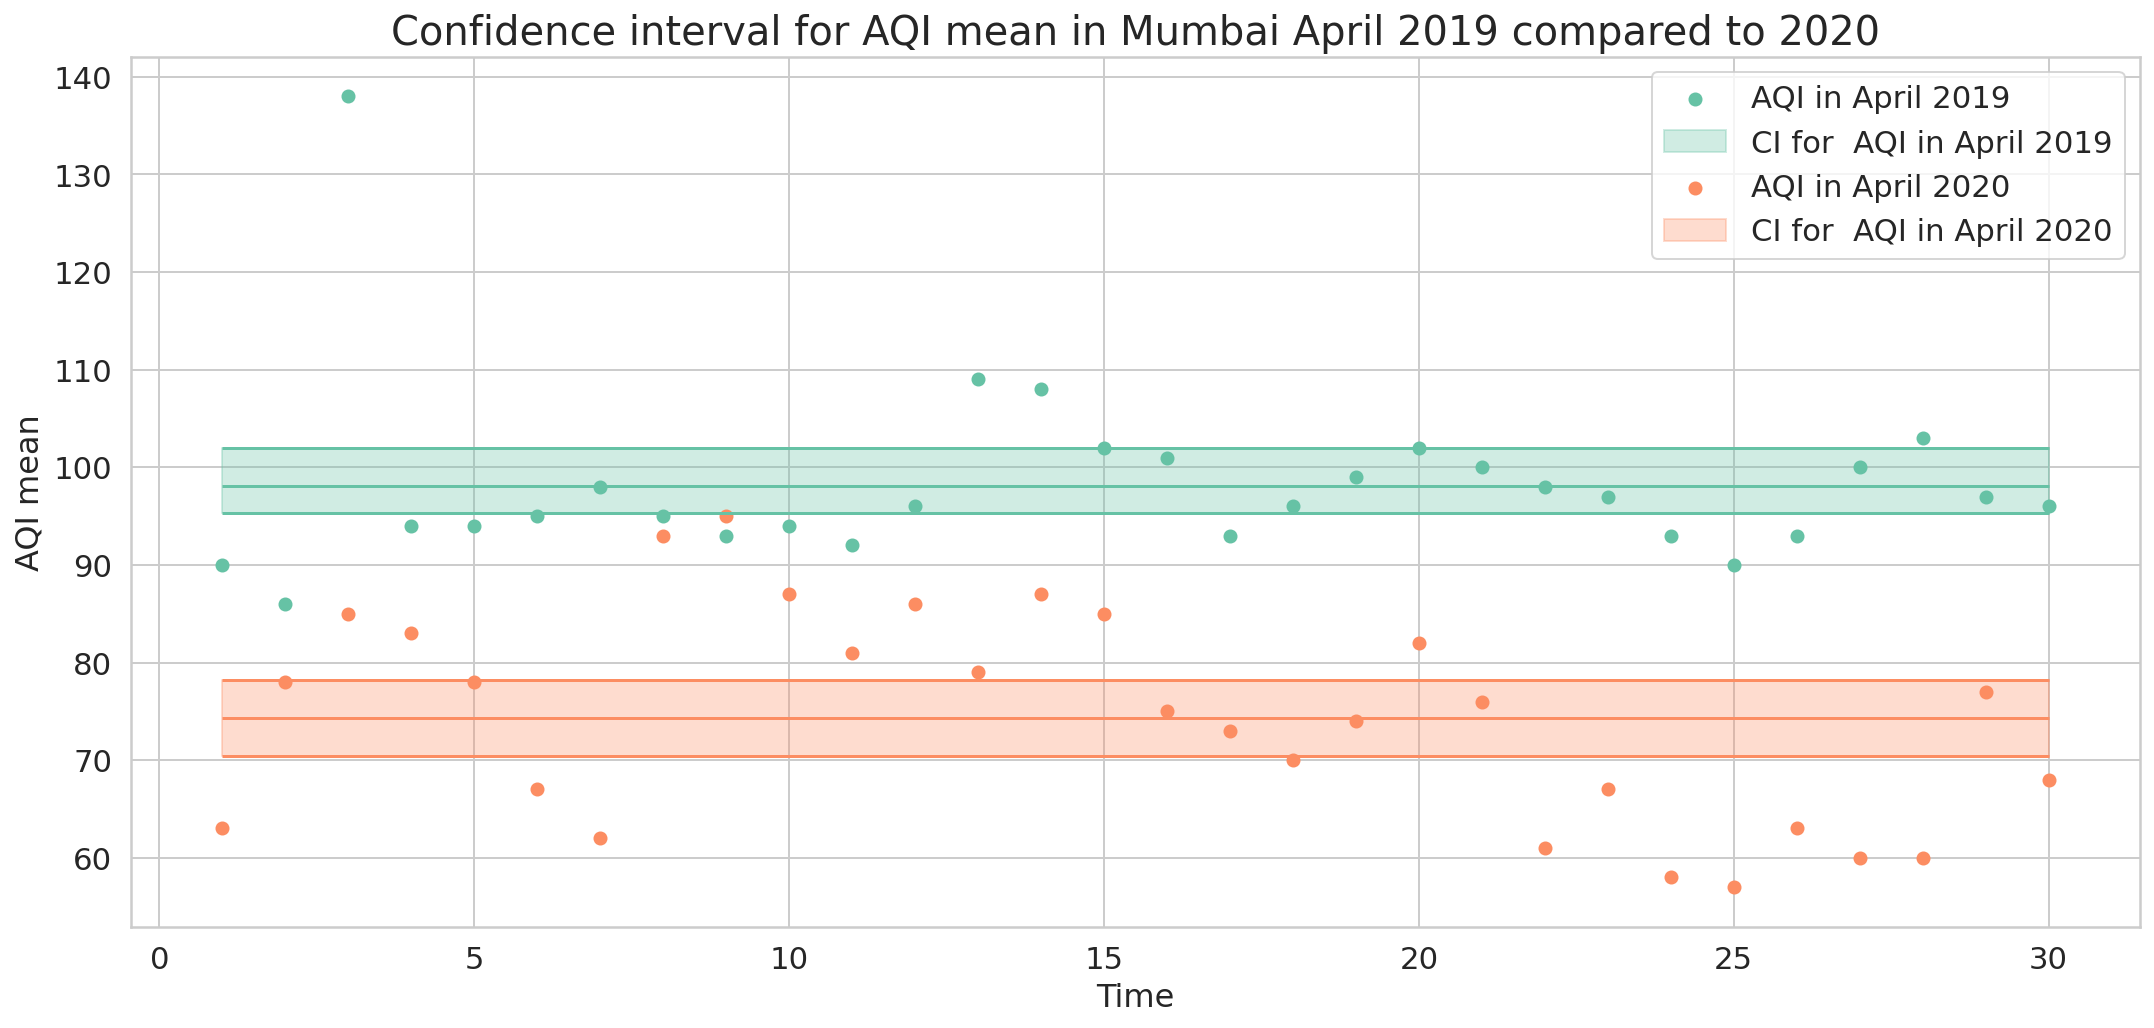

In [ ]:
compare_aqi_in_month_by_year(
    mumbai, month_num=4, years=[2019, 2020], month_str='April', days_in_month=30, 
    title='Confidence interval for AQI mean in Mumbai April 2019 compared to 2020',
    year_color=[color_in_2019, color_in_2020]
)

Теперь проделайте то же самое для Калькутты

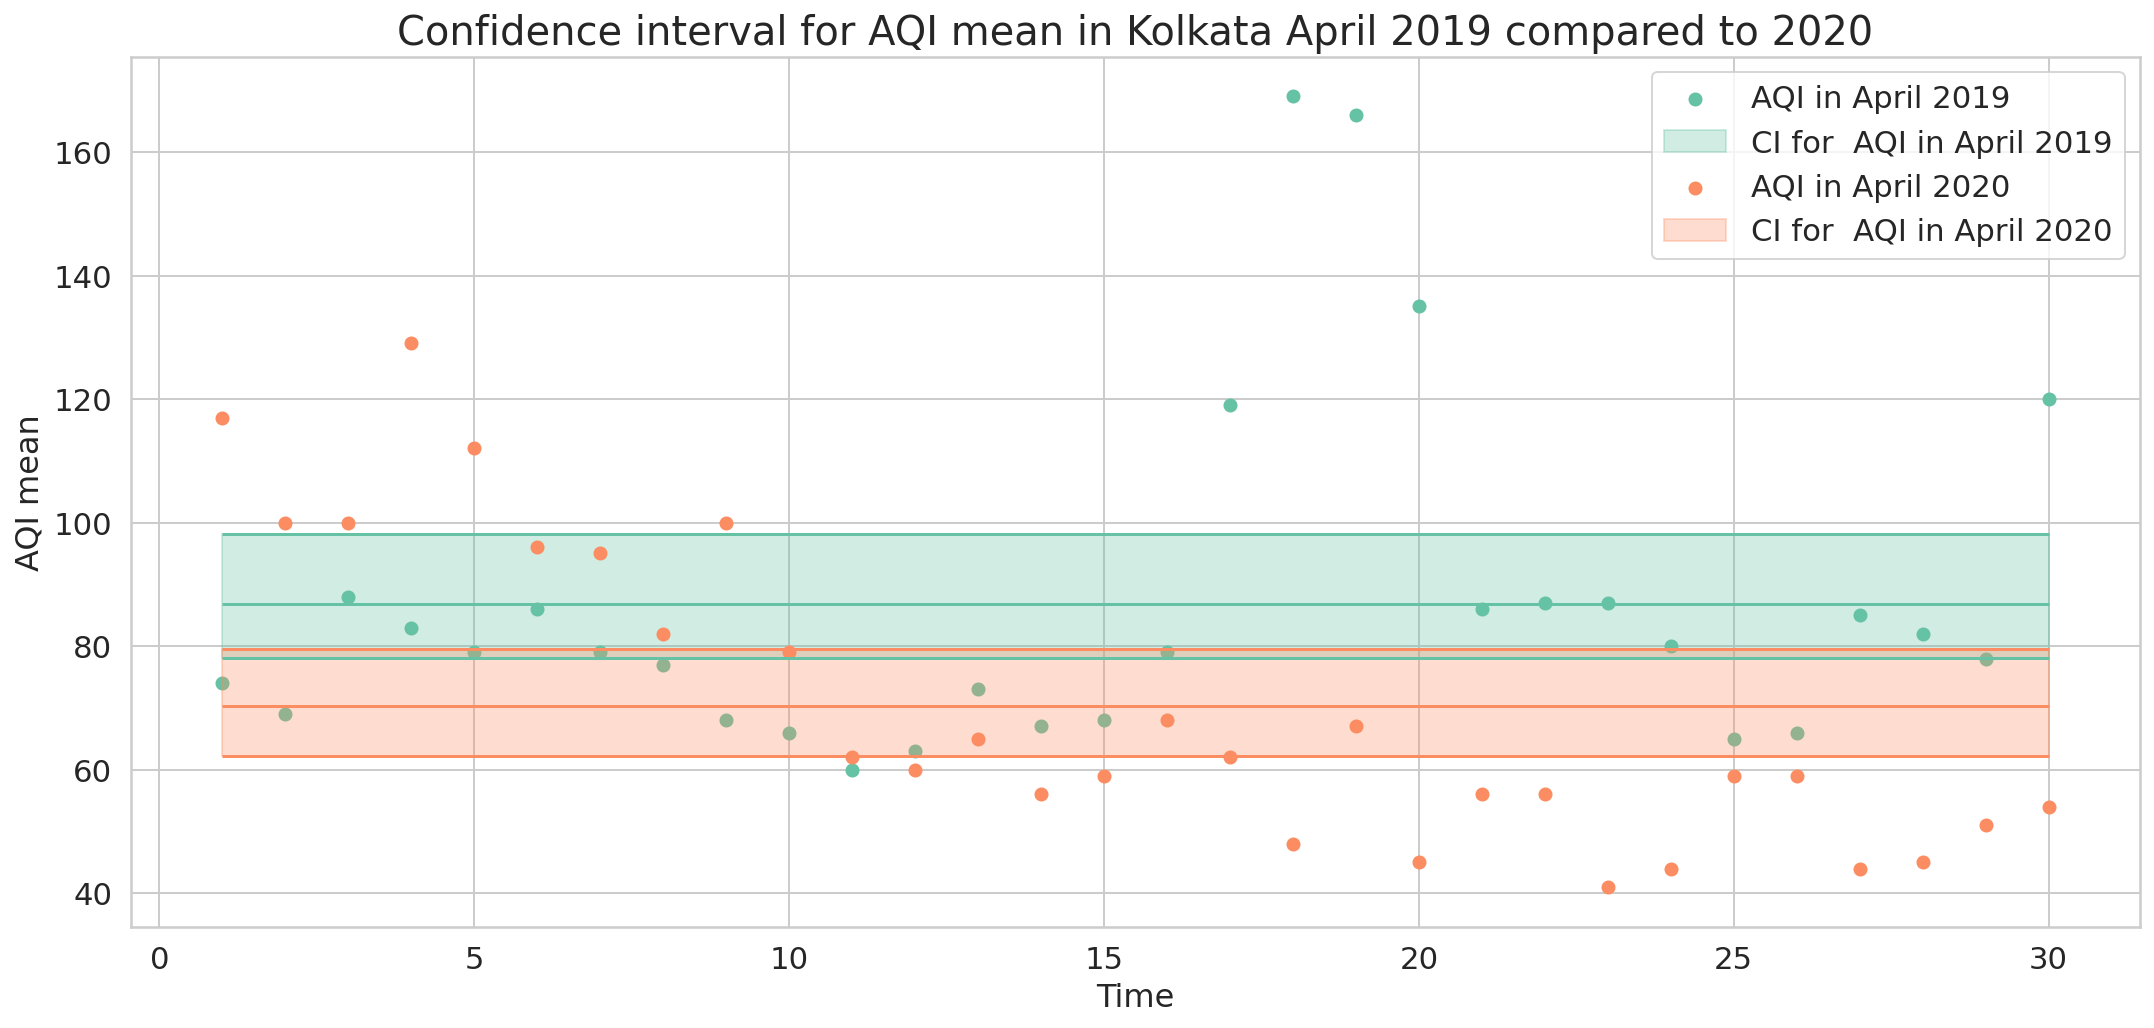

In [ ]:
compare_aqi_in_month_by_year(
    kolkata, month_num=4, years=[2019, 2020], month_str='April', days_in_month=30, 
    title='Confidence interval for AQI mean in Kolkata April 2019 compared to 2020',
    year_color=[color_in_2019, color_in_2020]
)

Сделайте выводы. Что можно сказать про доверительные интервалы в каждом из случаев?

**Выводы:**

*Во-первых,* из первого графика мы видим, что в апреле 2019 и 2020 в Мумбаи качество воздуха действительно достаточно сильно отличается (в 2020 лучше). Хотя доверительный интервал в 2020 немного шире чем в 2020.

*Во-вторых,* из второго графика мы видим, что в те же промежутки в Колкате наблюдается похожая, но немного другая ситуация. В данном случае и интервалы шире и разница между реальным средним в 2019 и в 2020 сильно меньше чем в Мумбаи.

*В-третьих,* сопоставляя оба графика мы снова приходим к выводу, что в 2020 году качество воздуха стало достаточно сильно лучше.